# Introduction - Exploratory Analysis

In this notebook, we will conduct an analysis of the data previously prepared in the path: `data/interim/hockey_teams.json`. This file, being partially processed, is easily accessible for import and ready for more detailed analytical examination.

This part of the workshop will focus on utilizing `pandas` and `matplotlib`, which were discussed during the course. The main objective is to familiarize ourselves with the dataset we are working on. Through a series of exercises:  
- we will get to know the structure of the data,  
- we will conduct elementary data exploration (EDA).

## Column Description

Below is a brief description of each column in our dataset:

- **Team Name**: The name of the team participating in the match.
- **Year**: The year in which the season takes place.
- **Wins**: The number of matches won by the team in the given season.
- **Losses**: The number of matches lost by the team in the given season.
- **OT Losses**: The number of matches lost by the team in overtime in the given season.
- **Win %**: The percentage of matches won by the team in the given season.
- **Goals For (GF)**: The number of goals scored by the team in the given season.
- **Goals Against (GA)**: The number of goals conceded by the team in the given season.
- **+ / -**: The difference between the number of goals scored and conceded by the team in the given season.

> Note: At this stage, certain significant simplifications were intentionally made in the analysis and they will not be explicitly mentioned, aiming for a discussion at the end of the workshop.

# Preparation

## Import libraries
Here, load the libraries that will be needed in the following steps

In [ ]:
pip install matplotlib

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Loading the Dataset

We recommend loading the raw data into a variable with the suffix `_raw`. This will avoid the need to reload the data from the beginning in case of an error, which can be a time-consuming process.  
  
> **Tip:** A `json` file can be easily loaded using `pandas` with the `read_json` function - [click](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html)  

Load data from the `hockey_teams` file here

In [2]:
dataframe_raw = pd.read_json('../data/interim/hockey_teams.json')

Check here if the data loaded correctly

In [3]:
dataframe_raw

Team Name  Year  Wins  Losses OT Losses  Win %  Goals For (GF)  \
0    Colorado Avalanche  2003    40      22         7  0.488             236   
1          Dallas Stars  2003    41      26         2  0.500             194   
2     Detroit Red Wings  2003    48      21         2  0.585             255   
3       Edmonton Oilers  2003    36      29         5  0.439             221   
4      Florida Panthers  2003    28      35         4  0.341             188   
..                  ...   ...   ...     ...       ...    ...             ...   
577      Buffalo Sabres  1994    22      19            0.458             130   
578      Calgary Flames  1994    24      17            0.500             163   
579  Chicago Blackhawks  1994    24      19            0.500             156   
580        Dallas Stars  1994    17      23            0.354             136   
581   Detroit Red Wings  1994    33      11            0.688             180   

     Goals Against (GA)  + / -  
0                   198     38  
1                   175     19  
2                   189     66  
3                   208     13  
4                   221    -33  
..                  ...    ...  
577                 119     11  
578                 135     28  
579                 115     41  
580                 135      1  
581                 117     63  

[582 rows x 9 columns]

# Preliminary Data Transformation

## Standardizing Column Names

Currently, our dataset contains original column names which, from a technical standpoint, should not contain spaces or other special characters.

In this section, we will standardize and simplify the naming conventions to facilitate data processing in subsequent stages. We will apply the following column name mapping:

- **Team Name** -> `team`
- **Year** -> `season`
- **Wins** -> `victories`
- **Losses** -> `defeats`
- **OT Losses** -> `overtime_defeats`
- **Win %** -> `victory_percentage`
- **Goals For (GF)** -> `scored_goals`
- **Goals Against (GA)** -> `received_goals`
- **\+ / -** -> `goal_difference`

> At this point, we recommend creating a new DataFrame without the `_raw` postfix. For example, if the data was loaded into the variable `df_raw`, we now want to work with the variable `df`, where we will modify the column names.

In [11]:
print(f"Column names:", dataframe_raw.columns)

Column names: Index(['Team Name', 'Year', 'Wins', 'Losses', 'OT Losses', 'Win %',
       'Goals For (GF)', 'Goals Against (GA)', '+ / -'],
      dtype='object')


In [12]:
dataframe_raw.rename(columns={'Team Name':'team',
                        'Year':'season',
                        'Wins':'victories',
                        'Losses':'defeats',
                        'OT Losses':'overtime_defeats',
                        'Win %':'victory_percentage',
                        'Goals For (GF)':'scored_goals',
                        'Goals Against (GA)':'received_goal',
                        '+ / -':'goal_difference'}, inplace=True)

In [13]:
print("New column names:", dataframe_raw.columns)

New column names: Index(['team', 'season', 'victories', 'defeats', 'overtime_defeats',
       'victory_percentage', 'scored_goals', 'received_goal',
       'goal_difference'],
      dtype='object')


In [5]:
dataframe_raw

Team Name  Year  Wins  Losses OT Losses  Win %  Goals For (GF)  \
0    Colorado Avalanche  2003    40      22         7  0.488             236   
1          Dallas Stars  2003    41      26         2  0.500             194   
2     Detroit Red Wings  2003    48      21         2  0.585             255   
3       Edmonton Oilers  2003    36      29         5  0.439             221   
4      Florida Panthers  2003    28      35         4  0.341             188   
..                  ...   ...   ...     ...       ...    ...             ...   
577      Buffalo Sabres  1994    22      19            0.458             130   
578      Calgary Flames  1994    24      17            0.500             163   
579  Chicago Blackhawks  1994    24      19            0.500             156   
580        Dallas Stars  1994    17      23            0.354             136   
581   Detroit Red Wings  1994    33      11            0.688             180   

     Goals Against (GA)  + / -  
0                   198     38  
1                   175     19  
2                   189     66  
3                   208     13  
4                   221    -33  
..                  ...    ...  
577                 119     11  
578                 135     28  
579                 115     41  
580                 135      1  
581                 117     63  

[582 rows x 9 columns]

## Removing Empty Values

As can be observed, the `overtime_defeats` column contains many empty values, and the expected data type is `int`. Before proceeding with further analysis, this column needs to be properly prepared.

To achieve this, we will perform the following steps:
- Check which symbol is used as an indicator of an empty field.
- Fill the empty fields with a value of 0.
- Then convert the data type of this column to `int`.

By following these steps, the `overtime_defeats` column will be ready for further analysis.

### Finding the Indicator of an Empty Field

In [15]:
dataframe_raw["overtime_defeats"].iloc[577]

''

### Overwriting Empty Values with 0

In [16]:
dataframe_raw.loc[dataframe_raw['overtime_defeats'] == '', 'overtime_defeats'] = 0

In [17]:
dataframe_raw

team  season  victories  defeats overtime_defeats  \
0    Colorado Avalanche    2003         40       22                7   
1          Dallas Stars    2003         41       26                2   
2     Detroit Red Wings    2003         48       21                2   
3       Edmonton Oilers    2003         36       29                5   
4      Florida Panthers    2003         28       35                4   
..                  ...     ...        ...      ...              ...   
577      Buffalo Sabres    1994         22       19                0   
578      Calgary Flames    1994         24       17                0   
579  Chicago Blackhawks    1994         24       19                0   
580        Dallas Stars    1994         17       23                0   
581   Detroit Red Wings    1994         33       11                0   

     victory_percentage  scored_goals  received_goal  goal_difference  
0                 0.488           236            198               38  
1                 0.500           194            175               19  
2                 0.585           255            189               66  
3                 0.439           221            208               13  
4                 0.341           188            221              -33  
..                  ...           ...            ...              ...  
577               0.458           130            119               11  
578               0.500           163            135               28  
579               0.500           156            115               41  
580               0.354           136            135                1  
581               0.688           180            117               63  

[582 rows x 9 columns]

### Column Type Conversion

In [18]:
dataframe_raw['overtime_defeats'] = dataframe_raw['overtime_defeats'].astype(int)

In [19]:
dataframe_raw.to_json('hockey_teams_cleaned.json', orient='records')


# Dataset Analysis

In this section, we will focus on answering fundamental questions about our dataset in the context of hockey games. The goal is to become familiar with the dataset and develop an intuition about it.  
  
Here is a list of exercises we will perform to find answers to key questions:  
  
- How many teams have participated in league games over the years?  
- What is the total number of available seasons?  
- What is the time span of the data?  
- Are there any suspicious or outlier values in the numerical columns?  
  
These exercises will help us better understand the structure and nature of our data.  

In [8]:
df = pd.read_json('../data/interim/hockey_teams_cleaned.json')

### Number of teams that participated in league matches

Here, indicate the total number of teams available in our dataset

In [9]:
all_teams = df['team'].unique()
print(all_teams)

all_teams_sum = len(all_teams)
print(f"Total number of teams: {all_teams_sum}")

['Colorado Avalanche' 'Dallas Stars' 'Detroit Red Wings' 'Edmonton Oilers'
 'Florida Panthers' 'Los Angeles Kings' 'Minnesota Wild'
 'Montreal Canadiens' 'Nashville Predators' 'New Jersey Devils'
 'New York Islanders' 'New York Rangers' 'Ottawa Senators'
 'Philadelphia Flyers' 'Phoenix Coyotes' 'Pittsburgh Penguins'
 'San Jose Sharks' 'St. Louis Blues' 'Tampa Bay Lightning'
 'Toronto Maple Leafs' 'Vancouver Canucks' 'Washington Capitals'
 'Mighty Ducks of Anaheim' 'Atlanta Thrashers' 'Boston Bruins'
 'Hartford Whalers' 'Buffalo Sabres' 'Calgary Flames' 'Anaheim Ducks'
 'Carolina Hurricanes' 'Columbus Blue Jackets' 'Chicago Blackhawks'
 'Winnipeg Jets' 'Minnesota North Stars' 'Quebec Nordiques']
Total number of teams: 35


### Total number of seasons

Here, indicate the total number of seasons.

In [46]:
all_seasons = df['season'].unique()
print(all_seasons)

all_seasons_sum = len(all_seasons)
print(f"Total number of seasons: {all_seasons_sum}")

[2003 2005 1996 1997 2010 2011 2007 2008 2006 2002 1995 1990 1991 2001
 2000 1992 1993 1999 1994 1998 2009]
Total number of seasons: 21


### Time Span of Data

Here, we will examine the availability of data for individual seasons. The analysis will be conducted in two stages:  
- First, we will determine the time range of the data by identifying the start year (`start_year`) and the end year (`end_year`). This will allow us to establish for which seasons we have information.  
- Next, we will look for any gaps in the time data to ensure that we have a complete set of information for each season.   

At this point, we will determine the start year and end year of the data:

In [23]:
start_year = df['season'].min()
end_year = df['season'].max()

print(f"Hockey games started in {start_year} and lasted until {end_year}")

Hockey games started in 1990 and lasted until 2011


Here, we will check if data is present for each year within the determined range:

In [24]:
len(df['season'].unique())

21

### Analysis of Numerical Columns

Here we will examine the basic descriptive statistics for numerical columns.

To this end, describe and analyze the results for the following columns:

- victories
- defeats
- overtime_defeats
- victory_percentage
- scored_goals
- received_goals
- goal_difference

We are interested in the following statistics:
- mean,
- count,
- standard deviation,
- percentiles = `[0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1]`

In [89]:
df['victories'].describe()
df['victories'].describe(percentiles=[0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1])

count    582.000000
mean      36.943299
std        8.926081
min        9.000000
0%         9.000000
5%        21.050000
10%       24.100000
25%       31.000000
50%       38.000000
75%       43.000000
90%       48.000000
95%       50.000000
100%      62.000000
max       62.000000
Name: victories, dtype: float64

In [100]:
df['defeats'].describe()
df['defeats'].describe(percentiles=[0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1])

count    582.000000
mean      32.353952
std        8.411439
min       11.000000
0%        11.000000
5%        20.000000
10%       23.000000
25%       27.000000
50%       31.000000
75%       37.000000
90%       43.000000
95%       47.000000
100%      71.000000
max       71.000000
Name: defeats, dtype: float64

In [99]:
df['overtime_defeats'].describe()
df['overtime_defeats'].describe(percentiles=[0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1])

count    582.000000
mean       4.589347
std        4.605402
min        0.000000
0%         0.000000
5%         0.000000
10%        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
90%       11.000000
95%       13.000000
100%      18.000000
max       18.000000
Name: overtime_defeats, dtype: float64

In [98]:
df['victory_percentage'].describe()
df['victory_percentage'].describe(percentiles=[0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1])

count    582.000000
mean       0.458519
std        0.102237
min        0.119000
0%         0.119000
5%         0.280300
10%        0.321000
25%        0.390000
50%        0.463000
75%        0.534000
90%        0.585000
95%        0.621850
100%       0.756000
max        0.756000
Name: victory_percentage, dtype: float64

In [97]:
df['scored_goals'].describe()
df['scored_goals'].describe(percentiles=[0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1])

count    582.000000
mean     234.063574
std       40.548915
min      115.000000
0%       115.000000
5%       175.050000
10%      190.100000
25%      211.000000
50%      231.000000
75%      254.000000
90%      282.900000
95%      305.950000
100%     369.000000
max      369.000000
Name: scored_goals, dtype: float64

In [96]:
df['received_goal'].describe()
df['received_goal'].describe(percentiles=[0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1])

count    582.000000
mean     234.063574
std       42.510718
min      115.000000
0%       115.000000
5%       168.050000
10%      187.000000
25%      207.000000
50%      232.500000
75%      258.750000
90%      286.000000
95%      303.000000
100%     414.000000
max      414.000000
Name: received_goal, dtype: float64

In [101]:
df['goal_difference'].describe()
df['goal_difference'].describe(percentiles=[0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1])

count    582.000000
mean       0.000000
std       45.277458
min     -196.000000
0%      -196.000000
5%       -72.000000
10%      -57.000000
25%      -27.000000
50%        4.000000
75%       31.000000
90%       54.000000
95%       68.000000
100%     144.000000
max      144.000000
Name: goal_difference, dtype: float64

# `team`

In this section, we will conduct a series of analyses on individual teams participating in the leagues. This will allow us to identify the teams that have performed best in the competitions over the years.


## Analysis of Team Participation in League Seasons
Let's perform the following exercises:

- Check how many teams have participated in all seasons of the selected league.
- Display the list of these teams.

In [27]:
all_teams_sum = len(df['team'].unique())
print(f"Number of teams:", all_teams_sum)

all_teams = df['team'].unique()
print(all_teams)

Number of teams: 35
['Colorado Avalanche' 'Dallas Stars' 'Detroit Red Wings' 'Edmonton Oilers'
 'Florida Panthers' 'Los Angeles Kings' 'Minnesota Wild'
 'Montreal Canadiens' 'Nashville Predators' 'New Jersey Devils'
 'New York Islanders' 'New York Rangers' 'Ottawa Senators'
 'Philadelphia Flyers' 'Phoenix Coyotes' 'Pittsburgh Penguins'
 'San Jose Sharks' 'St. Louis Blues' 'Tampa Bay Lightning'
 'Toronto Maple Leafs' 'Vancouver Canucks' 'Washington Capitals'
 'Mighty Ducks of Anaheim' 'Atlanta Thrashers' 'Boston Bruins'
 'Hartford Whalers' 'Buffalo Sabres' 'Calgary Flames' 'Anaheim Ducks'
 'Carolina Hurricanes' 'Columbus Blue Jackets' 'Chicago Blackhawks'
 'Winnipeg Jets' 'Minnesota North Stars' 'Quebec Nordiques']


In [29]:
all_seasons = df['season'].nunique()
print(all_seasons)

all_seasons_sum = len(df['season'].unique())
print(f"Number of seasons:", all_seasons_sum)

21
Number of seasons: 21


In [31]:
teams_in_seasons = df.groupby('team')['season'].nunique()
teams_in_seasons.head()

team
Anaheim Ducks         6
Atlanta Thrashers    11
Boston Bruins        21
Buffalo Sabres       21
Calgary Flames       21
Name: season, dtype: int64

List of teams that participated in all seasons of hockey competitions:

In [37]:
teams_in_all_seasons = teams_in_seasons[teams_in_seasons == all_seasons_sum]
teams_in_all_seasons

team
Boston Bruins          21
Buffalo Sabres         21
Calgary Flames         21
Chicago Blackhawks     21
Detroit Red Wings      21
Edmonton Oilers        21
Los Angeles Kings      21
Montreal Canadiens     21
New Jersey Devils      21
New York Islanders     21
New York Rangers       21
Philadelphia Flyers    21
Pittsburgh Penguins    21
St. Louis Blues        21
Toronto Maple Leafs    21
Vancouver Canucks      21
Washington Capitals    21
Name: season, dtype: int64

The number of teams that have played in all seasons:

In [38]:
teams_in_all_seasons_number = len(teams_in_all_seasons)
print("Number of teams in all seasons:", teams_in_all_seasons_number)

Number of teams in all seasons: 17


## Best Performing Teams in League History

Let's list the five best teams with the highest average `victory_percentage` over all years, presenting the data broken down by individual teams and seasons.

In [56]:
avg_victory_percentage = df.groupby('team')['victory_percentage'].mean()
avg_victory_percentage.head(5)
avg_victory_percentage_sorted = avg_victory_percentage.sort_values(ascending=False)
top_five_avg_vic = avg_victory_percentage_sorted.head(5)
top_five_avg_vic

team
Detroit Red Wings     0.586000
New Jersey Devils     0.534333
Anaheim Ducks         0.522333
Dallas Stars          0.516889
Colorado Avalanche    0.516062
Name: victory_percentage, dtype: float64

## Top Teams in History

Let's determine the top 5 teams that have won the most league titles in entire history. Let's consider whether, based on the available data, we can identify a single team that unquestionably deserves the title of the best in history.

For simplicity, let's assume that the league winner is the team with the most victories in a given season.

> Hint: The information contained in the article `Pandas > Summary of the 4th Meeting > Analytical Functions` may be useful.

In [42]:
df_winners = df.sort_values(by=['season', 'victories'], ascending=False)
df_winners_in_season = df.groupby(by='season')

df_winners_in_season_des = df.sort_values(by='season')
df_winners_in_season_des.head()

df_winners_in_season_by_team = df.groupby(by= 'team')
df_winners_in_season_by_team.head()

df_winners_in_season_by_team_sorted = df.sort_values(by='victories',ascending=False)
df_winners_in_season_by_team_sorted.head(6)


team  season  victories  defeats  overtime_defeats  \
176    Detroit Red Wings    1995         62       13                 0   
539    Detroit Red Wings    2005         58       16                 8   
290  Pittsburgh Penguins    1992         56       21                 0   
50     Vancouver Canucks    2010         54       19                 9   
478  Washington Capitals    2009         54       15                13   
117    Detroit Red Wings    2007         54       21                 7   

     victory_percentage  scored_goals  received_goal  goal_difference  
176               0.756           325            181              144  
539               0.707           305            209               96  
290               0.667           367            268               99  
50                0.659           262            185               77  
478               0.659           318            233               85  
117               0.659           257            184               73

Additionally, we will determine how many teams have **never won any season**.  
  
> **Note:** This task may seem more complex than it appears at first glance. Remember, during classes you can rely on the instructor's help, and outside of them - on the support of a mentor.

In [175]:
df_winners = df.sort_values(by=['season', 'victories'], ascending= False)
df_winners_in_season = df.groupby(by='season')
df_winners_in_season.head()

df_winners_in_season_des = df.sort_values(by='season')
df_winners_in_season_des.head()

df_winners_in_season_by_team = df.groupby(by= 'team')
df_winners_in_season_by_team.head()

df_losers_in_season_by_team_sorted = df.sort_values(by='victories',ascending=True)
df_losers_in_season_by_team_sorted.head(10)

team  season  victories  defeats  overtime_defeats  \
415          Ottawa Senators    1994          9       34                 0   
288          Ottawa Senators    1992         10       70                 0   
292          San Jose Sharks    1992         11       71                 0   
357        Atlanta Thrashers    1999         14       57                 4   
564          Ottawa Senators    1993         14       61                 0   
413       New York Islanders    1994         15       28                 0   
425            Winnipeg Jets    1994         16       25                 0   
215         Quebec Nordiques    1990         16       50                 0   
575  Mighty Ducks of Anaheim    1994         16       27                 0   
410        Los Angeles Kings    1994         16       23                 0   

     victory_percentage  scored_goals  received_goal  goal_difference  
415               0.188           117            174              -57  
288               0.119           202            395             -193  
292               0.131           218            414             -196  
357               0.171           170            313             -143  
564               0.167           201            397             -196  
413               0.312           126            158              -32  
425               0.333           157            177              -20  
215               0.200           236            354             -118  
575               0.333           125            164              -39  
410               0.333           142            174              -32

# `overtime_defeats`

The `overtime_defeats` variable informs us how many times a team lost in overtime throughout the year.  
  
In this section, we will perform the following exercises:  
- Identify the team that most frequently lost in overtime.  
- Rank the teams based on the number of overtime losses.  
- Calculate what percentage of teams lost at least once in overtime.  
- Determine the season with the highest number of games decided in overtime.  
  
> Let's make sure that the `overtime_defeats` column is of numeric type!  

In [43]:
df['overtime_defeats'].dtype

dtype('int64')

## The team losing most frequently in overtime

> Note: To solve this task, this article might be useful: `Pandas > Conference Summary > Analytical Functions`

In [57]:
most_losses = df.groupby('team')['overtime_defeats']
most_losses = df.sort_values(by='overtime_defeats', ascending=False)
most_losses.head()

team  season  victories  defeats  overtime_defeats  \
63      Florida Panthers    2011         38       26                18   
495  Tampa Bay Lightning    2008         24       40                18   
56   Carolina Hurricanes    2011         33       33                16   
55        Calgary Flames    2011         37       29                16   
24         Boston Bruins    2005         29       37                16   

     victory_percentage  scored_goals  received_goal  goal_difference  \
63                0.463           203            227              -24   
495               0.293           210            279              -69   
56                0.402           213            243              -30   
55                0.451           202            226              -24   
24                0.354           230            266              -36   

     goals_ratio  
63      0.894273  
495     0.752688  
56      0.876543  
55      0.893805  
24      0.864662

## Percentage of teams losing in overtime

The result of this task should be rounded to two decimal places

In [51]:
overtime_losses = df['overtime_defeats'].sum()


percentage_overtime_losses = (overtime_losses / all_teams_sum)
percentage_overtime_losses_rounded = round(percentage_overtime_losses, 2)

print(f"Percentage of teams losing in overtime: {percentage_overtime_losses_rounded}")

Percentage of teams losing in overtime: 76.31


# `goals_ratio`

Based on the variables `scored_goals` and `received_goals`, we will create a new variable - `goals_ratio`, defined as the ratio of goals scored to goals conceded.

Before we proceed with solving the task, let's consider the following issues:
- What values of the `goals_ratio` statistic can be considered indicative of good or poor team performance?
- In what situations can we determine that a team performed better or worse based on the value of `goals_ratio`?

## Creating a Variable

In [47]:
df['goals_ratio'] = df['scored_goals'] / df['received_goal']

Here we will perform a basic analysis of the variable by determining statistics such as:
- mean
- standard deviation
- quantiles 2, 3, 4

Let's consider what can be inferred from such a summary. Based on this, can we say that this statistic has outliers?

In [48]:
df['goals_ratio'].describe()
df['goals_ratio'].describe(percentiles=[.2, .3, .4])

count    582.000000
mean       1.019061
std        0.187878
min        0.506297
20%        0.852231
30%        0.913764
40%        0.964894
50%        1.015705
max        1.795580
Name: goals_ratio, dtype: float64

## Distribution of the variable `goals_ratio`

Let's generate the distribution of the variable `goals_ratio` using the `plt.hist` function from the `matplotlib` library, performing the task in two variants:
- with the number of bins determined using Rice's Rule,
- with the number of bins determined using the Square Root Rule.

Methods and formulas for determining the number of bins in a histogram can be found at this link: [Determining the number of bins in a histogram](https://www.statology.org/sturges-rule/).

**Tip:** To determine the distribution of a variable using `matplotlib`, you can use the `hist` function, available here: [Documentation for hist function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).

What are the floor and ceiling of a number - [Floor and ceiling of a number - Wikipedia](https://en.wikipedia.org/wiki/Floor_and_ceiling_functions)
> Question: How to calculate the ceiling of a number in Python without using additional libraries?

### Histogram of the variable using Rice's rule

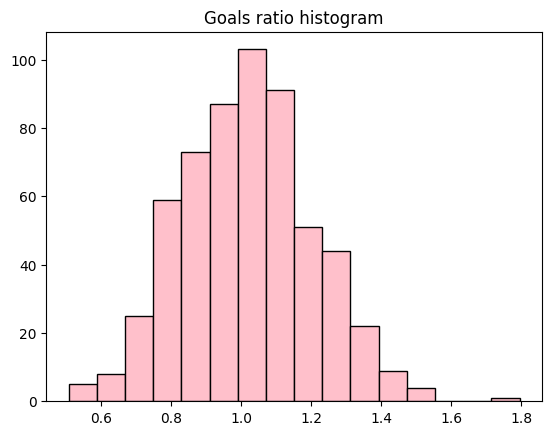

In [67]:
num_bins = num_bins = int(2 * (len(df) ** (1 / 3)))

plt.hist(df['goals_ratio'], bins=num_bins, color="pink", edgecolor="black")
plt.title('Goals ratio histogram')
plt.show()

### Histogram of the variable using the square root rule

Text(0.5, 1.0, 'Goals ratio histogram using square root rule')

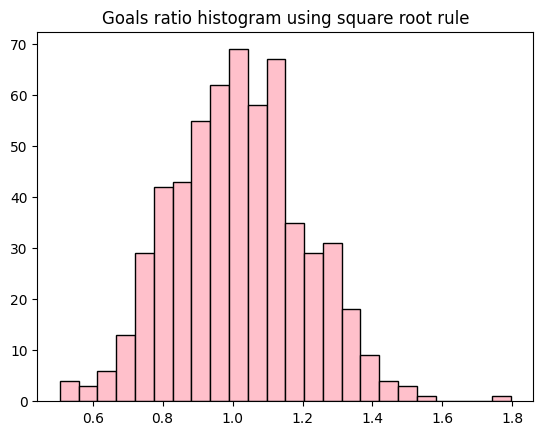

In [65]:
num_bins = int(np.sqrt(len(df)))

plt.hist(df['goals_ratio'],bins=num_bins,color="pink",edgecolor="black")

plt.title('Goals ratio histogram using square root rule')

# `victory_percentage`

Similar to the analysis of the variable `goals_ratio`, we will conduct an exploratory analysis of `victory_percentage` by following these steps:  
- Determine the basic descriptive statistics, such as the mean, median, standard deviation, minimum, and maximum.  
- Examine the distribution of the variable by using a histogram to better understand its characteristics.  
- Check if there are any obvious subgroups of teams within the variable under analysis that could be identified based on specific criteria, such as the range of the variable's values.

### Descriptive Statistics

In [214]:
df['victory_percentage'].describe()

count    582.000000
mean       0.458519
std        0.102237
min        0.119000
25%        0.390000
50%        0.463000
75%        0.534000
max        0.756000
Name: victory_percentage, dtype: float64

### Distribution

Here we will create the distribution of the variable, but we won't be doing it in two versions. Instead, we will choose a different, arbitrary number of intervals.

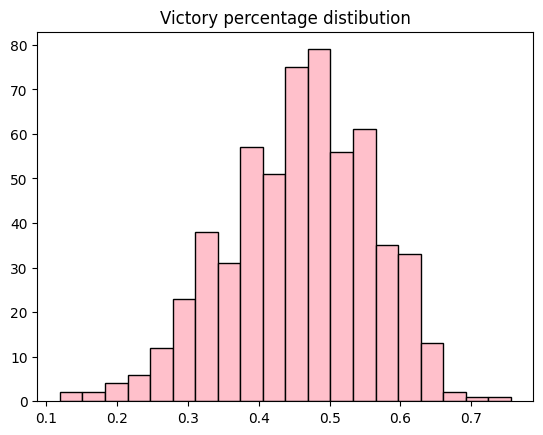

In [69]:
plt.hist(df['victory_percentage'],bins=20,color="pink",edgecolor="black")
plt.title("Victory percentage distibution")
plt.show()

# `goals_ratio` vs `victory_percentage`

We have already analyzed `goals_ratio` and `victory_percentage` as two separate variables. Now, our task is to analyze them together to identify potential interdependencies between them.  
  
In this step, we will perform the following exercises:  
- Before starting the analysis, let’s consider whether these variables might be dependent or independent of each other. What kind of relationship can be expected based on their business descriptions?  
- We will create a scatterplot to visually represent the dependencies between these variables.  
- We will determine the relationship between the variables based on the scatterplot.  
- We will analyze the scatterplot to identify any outliers, paying special attention to their common distribution.

## Scatterplot of Variables

Now let's create a scatterplot for the two analyzed variables, `goals_ratio` and `victory_percentage`. After completing this step, let's answer the following questions:  
- What is the relationship between the variables `goals_ratio` and `victory_percentage`?  
- Can any outliers be identified in the plot? If so, what criteria were used to identify them?

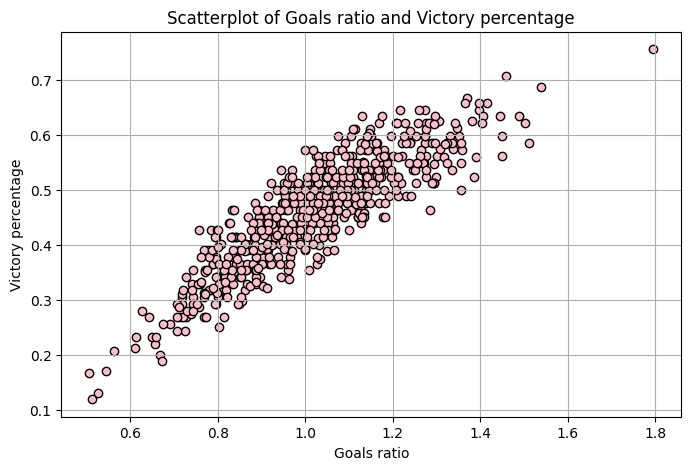

In [90]:
plt.figure(figsize=(8,5))
plt.scatter(x=df['goals_ratio'],y=df['victory_percentage'],color="pink",edgecolors="black")
plt.grid()
plt.title("Scatterplot of Goals ratio and Victory percentage")
plt.xlabel("Goals ratio")
plt.ylabel("Victory percentage")
plt.show()

> space for chart analysis notes

If we have identified outlying observations at an earlier stage of analysis, let's now examine these specific cases. We will focus on outliers concerning the variables `goals_ratio` and `victory_percentage` to understand what features distinguish them.

The following steps should be taken for analysis:
1. Identify the specific outlying observations that were detected earlier.
2. Analyze the characteristics of these observations, paying attention to their values for the variables `goals_ratio` and `victory_percentage`.
3. Try to understand what might have caused their outlying nature. Are these instances of anomalies, or could they be the result of natural fluctuations in the data?

In [84]:
df.loc[(df['goals_ratio'] > 1.7)&(df['victory_percentage'] > 0.75)]

team  season  victories  defeats  overtime_defeats  \
176  Detroit Red Wings    1995         62       13                 0   

     victory_percentage  scored_goals  received_goal  goal_difference  \
176               0.756           325            181              144   

     goals_ratio  
176      1.79558

# Summary

In this notebook, we conducted a basic exploratory analysis of our dataset. The data was cleaned and then enriched with new variables, which we subjected to further analysis. The final step of this part is to save the processed data to a CSV file.  
  
**Let's save our data frame to the file:** `data/processed/hockey_teams.csv`, using a semicolon (`;`) as the column separator.

Next, in the following phase of our work, we will propose betting odds based on the analyzed historical data and discuss the results of this analysis.

### Writing the frame to the target location

- file name: `data/processed/hockey_teams.csv`,
- column separator: `;`,
- remember to disable index saving.

In [85]:
df.to_csv('../data/processed/hockey_teams.csv',sep=';',index=False)